In [3]:
# imports
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
#read data rangering.csv
rangering_df=pd.read_csv('sample_data/rangering.csv')

In [5]:
#see table of data rangering.csv
rangering_df.head()

,BrukerID,FilmID,Rangering,Tidstempel
0,0,88,3,959441640
1,0,365,3,959442446
2,0,150,5,959442486
3,0,161,3,959442624
4,0,323,4,959442669


In [6]:
#calculate the total number of ratings
print('The data contains', len(rangering_df), 'lines')

The data contains 5791 lines


In [7]:
#read data bruker.csv
bruker_df=pd.read_csv('sample_data/bruker.csv')

In [8]:
#see table of data of the users
bruker_df.head()

,BrukerID,Kjonn,Alder,Jobb,Postkode
0,0,M,45,6,92103
1,4,M,35,6,48105
2,6,M,50,14,02651
3,8,M,25,4,70806
4,9,M,25,19,45701


In [9]:
#overview of the ages of the users

#mean ages
a=bruker_df['Alder']
mean=sum(a)/len(a)
print ('Mean age is:', mean) #observe that for example the age 35 is in fact the interval of ages [35, 44]

#median ages
median=np.median(a)
print('Median is:', median)

#mode ages, returns the mode as well as the counts (25 years old is the mode, which appears 71 times)
mode=stats.mode(a)
print('Mode is:', mode)

#variance ages
variance=np.var(a)
print('Variance is:', variance)

Mean age is: 30.8
Median is: 25.0
Mode is: ModeResult(mode=array([25]), count=array([71]))
Variance is: 137.47000000000003


In [10]:
#total number of users
n=len(bruker_df)
print('Total numer of users is:', n)

#percentages of women and men
g=bruker_df['Kjonn']

l=[]
for i in g:
    if i=='F':
        l.append('F') #add the female appearances 'F' to an empty list l
        
        f=len(l) #count the number of 'F'
print('Number of women is:', f)

Fpercent= (f/ n) * 100
Mpercent=100-Fpercent

print('Percentage of women is:', Fpercent)
print('Number of men is:', n-f)
print('Percentage of men is:', Mpercent)

Total numer of users is: 200
Number of women is: 52
Percentage of women is: 26.0
Number of men is: 148
Percentage of men is: 74.0


In [11]:
#overview of the professions
j=bruker_df['Jobb']

#mode of the profession fields
mode=stats.mode(j)
print('Mode of the jobs is:', mode) #corresponds to the number 0 and appears 24 times, which is "other/not specified"

#mode of the women's professions
#fj=[bruker_df['Kjonn'], bruker_df['Jobb']]

#positions of the women in bruker_df
indices = [i for i, x in enumerate(bruker_df['Kjonn']) if x == "F"]

#list of women's jobs
for i in indices:
    fj=bruker_df['Jobb'][i]
#mode of the females jobs
modefem=stats.mode(fj)
print('Mode of the womens jobs is:', modefem) #which is number 4, corresponding to "student" (why count=array[1] here??)

#positions of men in bruker_df
indicesM=[i for i, x in enumerate(bruker_df['Kjonn']) if x == "M"]

#list of men's jobs
for i in indicesM:
    fm=bruker_df['Jobb'][i]
#mode of the females jobs
modemas=stats.mode(fm)
print('Mode of the mens jobs is:', modemas)  #position 20, 'forfatter', contradicts the total which is 'other'  (?????)

Mode of the jobs is: ModeResult(mode=array([0]), count=array([24]))
Mode of the womens jobs is: ModeResult(mode=array([4]), count=array([1]))
Mode of the mens jobs is: ModeResult(mode=array([20]), count=array([1]))


In [12]:
#read data movies
film_df=pd.read_csv('sample_data/film.csv')

In [13]:
#see table of data movies
film_df.head()

,FilmID,Tittel,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,Autumn in New York (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,"Vie est belle, La (Life is Rosey) (1987)",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Defying Gravity (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Ruthless People (1986),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Portraits Chinois (1996),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
#the position of the movies in film_df are precisely their FilmIDs in rangering_df
action=[]
adventure=[]
animation=[]
children=[]
comedy=[]
crime=[]
documentary=[]
drama=[]
fantasy=[]
filmnoir=[]
horror=[]
musical=[]
mystery=[]
romance=[]
sci=[]
thriller=[]
war=[]
western=[]

for (i,j) in enumerate((film_df['Action'])):
    if j==1:
       action.append(i)
    
for (i,j) in enumerate((film_df['Adventure'])):
    if j==1:
        adventure.append(i)


for (i,j) in enumerate((film_df['Animation'])):
    if j==1:
        animation.append(i)
        
for (i,j) in enumerate((film_df['Children\'s'])):
    if j==1:
       children.append(i)
    
for (i,j) in enumerate((film_df['Comedy'])):
    if j==1:
        comedy.append(i)

for (i,j) in enumerate((film_df['Crime'])):
    if j==1:
        crime.append(i)
    
for (i,j) in enumerate((film_df['Documentary'])):
    if j==1:
        documentary.append(i)
        
for (i,j) in enumerate((film_df['Drama'])):
    if j==1:
        drama.append(i)


for (i,j) in enumerate((film_df['Fantasy'])):
    if j==1:
        fantasy.append(i)


for (i,j) in enumerate((film_df['Film-Noir'])):
    if j==1:
        filmnoir.append(i)


for (i,j) in enumerate((film_df['Horror'])):
    if j==1:
        horror.append(i)


for (i,j) in enumerate((film_df['Musical'])):
    if j==1:
        musical.append(i)


for (i,j) in enumerate((film_df['Mystery'])):
    if j==1:
        mystery.append(i)


for (i,j) in enumerate((film_df['Romance'])):
    if j==1:
        romance.append(i)


for (i,j) in enumerate((film_df['Sci-Fi'])):
    if j==1:
        sci.append(i)


for (i,j) in enumerate((film_df['Thriller'])):
    if j==1:
        thriller.append(i)

for (i,j) in enumerate((film_df['War'])):
    if j==1:
        war.append(i)


for (i,j) in enumerate((film_df['Western'])):
    if j==1:
        western.append(i)


In [15]:
#number of movies per genre

print ('The total number of action movies is:', len(action))
print ('The total number of adventure movies is:', len(adventure))
print ('The total number of animation movies is:', len(animation))
print ('The total number of children\'s movies is:', len(children))
print ('The total number of comedies is:', len(comedy))
print ('The total number of crime movies is:', len(crime))
print ('The total number of documentary movies is:', len(documentary))
print ('The total number of drama movies is:', len(drama))
print ('The total number of fantasy movies is:', len(fantasy))
print ('The total number of film-noir movies is:', len(filmnoir))
print ('The total number of horror movies is:', len(horror))
print ('The total number of musical movies is:', len(musical))
print ('The total number of mystery movies is:', len(mystery))
print ('The total number of romance movies is:', len(romance))
print ('The total number of Sci-Fi movies is:', len(sci))
print ('The total number of thriller movies is:', len(thriller))
print ('The total number of war movies is:', len(war))
print ('The total number of western movies is:', len(western))

The total number of action movies is: 70
The total number of adventure movies is: 42
The total number of animation movies is: 18
The total number of children's movies is: 36
The total number of comedies is: 130
The total number of crime movies is: 31
The total number of documentary movies is: 18
The total number of drama movies is: 208
The total number of fantasy movies is: 9
The total number of film-noir movies is: 8
The total number of horror movies is: 44
The total number of musical movies is: 21
The total number of mystery movies is: 24
The total number of romance movies is: 65
The total number of Sci-Fi movies is: 41
The total number of thriller movies is: 62
The total number of war movies is: 13
The total number of western movies is: 8


In [16]:
print("The total number of movies is:", len(film_df))

The total number of movies is: 494


In [17]:
#corresponding ratings to movies by genres

r_action=[]
r_adventure=[]
r_animation=[]
r_children=[]
r_comedy=[]
r_crime=[]
r_documentary=[]
r_drama=[]
r_fantasy=[]
r_filmnoir=[]
r_horror=[]
r_musical=[]
r_mystery=[]
r_romance=[]
r_sci=[]
r_thriller=[]
r_war=[]
r_western=[]

means=[]

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in action:
        r_action.append(rangering_df['Rangering'][i])
        
mean_action=sum(r_action)/len(r_action)
means.append(mean_action)
        
for (i,j) in enumerate(rangering_df['FilmID']):
    if j in adventure:
        r_adventure.append(rangering_df['Rangering'][i]) 
        
mean_adventure=sum(r_adventure)/len(r_adventure)
means.append(mean_adventure)        

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in animation:
        r_animation.append(rangering_df['Rangering'][i])
        
mean_animation=sum(r_animation)/len(r_animation)
means.append(mean_animation)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in children:
        r_children.append(rangering_df['Rangering'][i])
        
mean_children=sum(r_children)/len(r_children)
means.append(mean_children)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in comedy:
        r_comedy.append(rangering_df['Rangering'][i])
        
mean_comedy=sum(r_comedy)/len(r_comedy)
means.append(mean_comedy)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in crime:
        r_crime.append(rangering_df['Rangering'][i])
        
mean_crime=sum(r_crime)/len(r_crime)
means.append(mean_crime)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in documentary:
        r_documentary.append(rangering_df['Rangering'][i])
        
mean_documentary=sum(r_documentary)/len(r_documentary)
means.append(mean_documentary)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in drama:
        r_drama.append(rangering_df['Rangering'][i])
        
mean_drama=sum(r_drama)/len(r_drama)
means.append(mean_drama)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in fantasy:
        r_fantasy.append(rangering_df['Rangering'][i])
        
mean_fantasy=sum(r_fantasy)/len(r_fantasy)
means.append(mean_fantasy)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in filmnoir:
        r_filmnoir.append(rangering_df['Rangering'][i])
        
mean_filmnoir=sum(r_filmnoir)/len(r_filmnoir)
means.append(mean_filmnoir)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in horror:
        r_horror.append(rangering_df['Rangering'][i])
        
mean_horror=sum(r_horror)/len(r_horror)
means.append(mean_horror)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in musical:
        r_musical.append(rangering_df['Rangering'][i])
        
mean_musical=sum(r_musical)/len(r_musical)
means.append(mean_musical)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in mystery:
        r_mystery.append(rangering_df['Rangering'][i])
        
mean_mystery=sum(r_mystery)/len(r_mystery)
means.append(mean_mystery)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in romance:
        r_romance.append(rangering_df['Rangering'][i])
        
mean_romance=sum(r_romance)/len(r_romance)
means.append(mean_romance)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in sci:
        r_sci.append(rangering_df['Rangering'][i])
        
mean_sci=sum(r_sci)/len(r_sci)
means.append(mean_sci)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in thriller:
        r_thriller.append(rangering_df['Rangering'][i])
        
mean_thriller=sum(r_thriller)/len(r_thriller)
means.append(mean_thriller)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in war:
        r_war.append(rangering_df['Rangering'][i])
        
mean_war=sum(r_war)/len(r_war)
means.append(mean_war)

for (i,j) in enumerate(rangering_df['FilmID']):
    if j in western:
        r_western.append(rangering_df['Rangering'][i])
        
mean_western=sum(r_western)/len(r_western)
means.append(mean_western)

print('The mean rating for genres is:', means) 

The mean rating for genres is: [3.5009174311926605, 3.554561717352415, 3.5764705882352943, 3.4143302180685358, 3.4966124661246614, 3.7453310696095077, 3.5602836879432624, 3.536355475763016, 3.816326530612245, 3.8680555555555554, 3.609942638623327, 3.4357798165137616, 3.669811320754717, 3.4983660130718954, 3.480234260614934, 3.4783715012722647, 3.6724890829694323, 3.561797752808989]


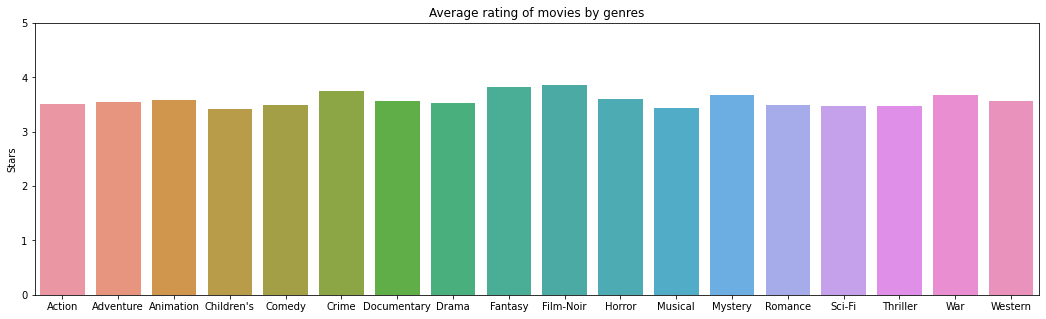

In [18]:
genres=['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


plt.figure(figsize=(18,5))

# Add title
plt.title("Average rating of movies by genres")

# Bar chart of the averages of rankings of movies by genres, from 0 to 5 stars
sns.barplot(x=genres, y=means)
plt.ylim(0, 5)

# Add label for vertical axis
plt.ylabel('Stars')

plt.show()

In [19]:
#data rangering_df ordered by highest ranking

top_movies = rangering_df.sort_values('Rangering', ascending=False)
top_movies.head()


,BrukerID,FilmID,Rangering,Tidstempel
2444,139,150,5,965242634
1026,58,454,5,965352914
1024,58,484,5,965352718
1023,58,176,5,965352718
4409,280,30,5,960010596


In [20]:
#lines with top ratings (5 stars)
top_rankings=rangering_df[(rangering_df['Rangering'] ==5)]
top_rankings.head()

,BrukerID,FilmID,Rangering,Tidstempel
2,0,150,5,959442486
17,0,367,5,959443403
18,0,283,5,959443477
21,0,325,5,959443684
22,0,494,5,959443709


In [21]:
#FilmsID with top ratings 
movies_toprankings=top_rankings['FilmID']
movies_toprankings.head()

#first column are the filmIDs and second column how many times have been rated, all these movies had 5 stars
top_rankings['FilmID'].value_counts()


408    51
150    40
135    27
424    25
365    24
       ..
349     1
345     1
116     1
327     1
262     1
Name: FilmID, Length: 229, dtype: int64

In [22]:
#get titles of top rated movies (not sure if it is okay , I get same order as in film_df)
o=top_rankings['FilmID'].value_counts()
for (i,j) in enumerate(o):
    if j>20:
        print(film_df['Tittel'][i])
        
#This can be a baseline recommender model, without personalizing the predictions, so that every user gets these same ones.

Autumn in New York (2000)
Vie est belle, La (Life is Rosey) (1987)
Defying Gravity (1997)
Ruthless People (1986)
Portraits Chinois (1996)
Defending Your Life (1991)
Omega Code, The (1999)
Hard 8 (a.k.a. Sydney, a.k.a. Hard Eight) (1996)
Mad City (1997)
National Lampoon's Senior Trip (1995)


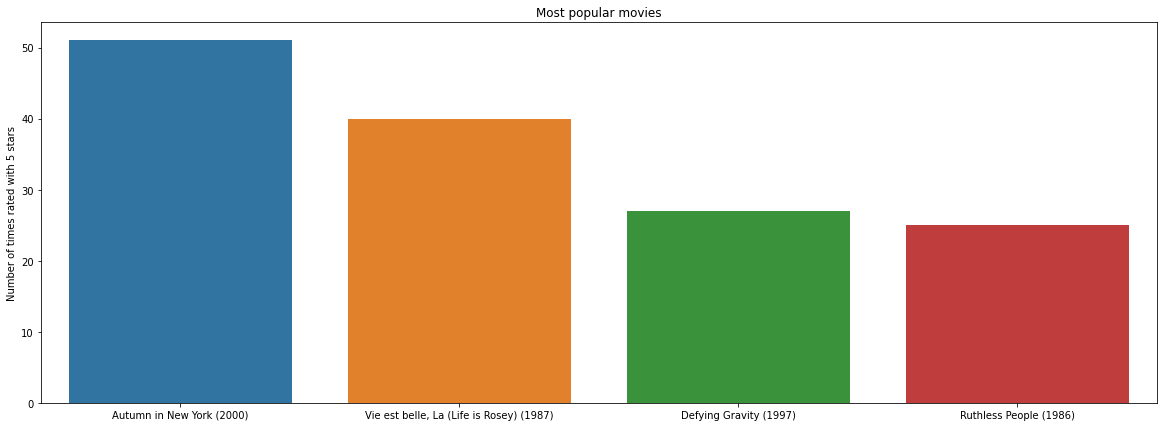

In [23]:
#visualization of top movies if they have been rated at least 25 times with 5 stars
plt.figure(figsize=(20,7))

o=top_rankings['FilmID'].value_counts()
vis_top=[]
titles_top=[]
for (i,j)in enumerate(o):
    if j>=25:
        vis_top.append(j)
        titles_top.append(film_df['Tittel'][i])
    
# Add title
plt.title("Most popular movies")

sns.barplot(x=titles_top, y=vis_top)

# Add label for vertical axis
plt.ylabel('Number of times rated with 5 stars')

plt.show()

In [24]:
#Calculate the average/mean rating per genre for each user.

merge=pd.merge(rangering_df, film_df)

genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary','Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
   
mdf = pd.melt(merge[['BrukerID', 'Rangering']+genres], 
              id_vars=['BrukerID', 'Rangering'], var_name='genre')

#group movies into genres if they have value 1
mdf = mdf[mdf['value']==1][['BrukerID', 'Rangering', 'genre']]

#means 
means_gender_df = pd.pivot_table(mdf, columns = ['genre'], index = ['BrukerID'], 
                    values = ['Rangering'], aggfunc = np.mean)

means_gender_df.head()

Rangering                                                      \
genre       Action Adventure Animation    Comedy     Crime Documentary   
BrukerID                                                                 
0         3.400000  3.222222  3.571429  3.090909  4.000000         NaN   
4         3.428571  3.500000       NaN  4.000000  4.000000         NaN   
6         4.400000  5.000000       NaN  2.333333       NaN         NaN   
8         4.000000  4.000000  4.000000  3.500000  4.500000         NaN   
9         3.160000  3.700000  3.000000  3.615385  3.333333         3.0   

                                                                            \
genre        Drama Fantasy Film-Noir    Horror   Musical Mystery   Romance   
BrukerID                                                                     
0         3.700000     3.5       5.0  3.000000  3.000000     4.0  3.368421   
4         4.125000     NaN       4.0  4.750000       NaN     4.0  3.500000   
6         4.000000     5.0       NaN  2.000000  1.000000     NaN  4.000000   
8         3.888889     4.0       5.0  5.000000  4.000000     5.0  3.666667   
9         3.666667     3.0       3.0  3.333333  1.666667     4.0  3.857143   

                                           
genre       Sci-Fi  Thriller  War Western  
BrukerID                                   
0         3.533333  3.666667  NaN     3.0  
4         3.666667  4.125000  5.0     2.0  
6         4.250000  3.666667  NaN     4.0  
8              NaN  4.000000  NaN     NaN  
9         2.166667  3.500000  NaN     2.0

In [25]:
#ordered mean ratings for each movie

ordmeans=rangering_df.groupby('FilmID')['Rangering'].mean().sort_values(ascending=False)
ordmeans.head()

#output is a first column with FilmIDs and a second column with the mean rating

FilmID
35     5.0
443    5.0
449    5.0
444    5.0
227    5.0
Name: Rangering, dtype: float64

In [26]:
#total number of times each movie has been rated
totalrat=rangering_df.groupby('FilmID')['Rangering'].count().sort_values(ascending=False)
totalrat.head()
#output is a first column with the FilmIDs and a second column with the number of times it has been rated

FilmID
408    110
295     94
150     84
424     83
365     74
Name: Rangering, dtype: int64

In [27]:
#movies with high rating but also with a high number of people rating them
rangpop=pd.DataFrame(rangering_df.groupby('FilmID')['Rangering'].mean())
rangpop['number of votes'] = pd.DataFrame(rangering_df.groupby('FilmID')['Rangering'].count())
rangpop.head()

,Rangering,number of votes
FilmID,,
0,3.200000,5
3,3.333333,27
5,3.411765,17
6,2.200000,5
7,3.600000,5


In [28]:
#Baseline (unpersonalized) recommender model, the same movies are recommended to everyone if they got an average rating of at least 4 and were voted at least 20 times

#FilmIDs of the most rated movies
indexes=totalrat.index

#Film IDs of the ones rated at least by 20 users
goodindexes=[]
for i in totalrat:
    if i>=20:
        goodindexes.append(indexes[i])

#FilmIDs together with their ratings if they have been rated at least by 20 users and got an avarage of at least 4 stars
recommended_movies_ID=[]
recommended_movies_ratings=[]
for i in ordmeans.index:
    if i in goodindexes:
        if ordmeans[i]>=4:
            recommended_movies_ID.append(i)
            recommended_movies_ratings.append(ordmeans[i])
            print('Recommended movie ID:', i, 'with average rating:', ordmeans[i])       
        
        


Recommended movie ID: 135 with average rating: 4.478260869565218
Recommended movie ID: 30 with average rating: 4.384615384615385
Recommended movie ID: 396 with average rating: 4.333333333333333
Recommended movie ID: 179 with average rating: 4.277777777777778
Recommended movie ID: 316 with average rating: 4.229166666666667
Recommended movie ID: 308 with average rating: 4.173913043478261
Recommended movie ID: 438 with average rating: 4.153846153846154
Recommended movie ID: 164 with average rating: 4.08
Recommended movie ID: 133 with average rating: 4.026315789473684
Recommended movie ID: 415 with average rating: 4.025
Recommended movie ID: 367 with average rating: 4.0


In [29]:
#Result of the baseline model: titles of the recommended movies, which are movies rated at least by 20 users with an average of at least 4 stars.
print('The recommended movies are:')
for i in recommended_movies_ID:
    print(film_df['Tittel'][i])

The recommended movies are:
Two Thousand Maniacs! (1964)
Wrong Trousers, The (1993)
Lethal Weapon 2 (1989)
Nineteen Eighty-Four (1984)
Hard Target (1993)
To Sir with Love (1967)
Mole People, The (1956)
Happiness Is in the Field (1995)
Maltese Falcon, The (1941)
Man Who Would Be King, The (1975)
Best Laid Plans (1999)


In [30]:
#Films IDs together with their titles
film_id_df=film_df.loc[:,['Tittel']].dropna()
film_id_df.head()

,Tittel
0,Autumn in New York (2000)
1,"Vie est belle, La (Life is Rosey) (1987)"
2,Defying Gravity (1997)
3,Ruthless People (1986)
4,Portraits Chinois (1996)


In [31]:
#Model:

merge_df=pd.merge(film_df, rangering_df)
reduced_df=merge_df.loc[:, ['BrukerID', 'FilmID', 'Rangering', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].dropna()

#independent variable X consisting of the profiles of the movies, X=(X1,...,Xn) for n movies/FilmIDs
#dependent variable Y consisting of the rankings of the movies
X=pd.get_dummies(reduced_df.loc[:,['FilmID', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] ]).values
y=reduced_df['Rangering'].values

#separation of data
#train_size is the proportion of dataset to be included in the train split (70%)
#test_size the proportion in the test split (15%)
#I do not specify random_state in train_test_split so that it performs a random split of the data by default.

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test=train_test_split(X_valtest, y_valtest, test_size=0.15)

In [32]:
#Content-based model using a logistic regression
logreg=LogisticRegression(penalty='none', solver='newton-cg')

#train the model
logreg.fit(X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [33]:
#validation step
y_pred=logreg.predict(X_val)

In [34]:
#mean squared errors
y_pred_train=logreg.predict(X_train)
MSE_train=mean_squared_error(y_train, y_pred_train)

y_pred_val=logreg.predict(X_val)
MSE_val=mean_squared_error(y_val, y_pred_val)


print('The MSE of the training data is:', MSE_train)
print('The MSE of the validating data is:', MSE_val)

#We get a bit of an underfit, since MSE_val<MSE_train. 

The MSE of the training data is: 1.392795460152973
The MSE of the validating data is: 1.3006093432633716


In [35]:
#generalization/prediction for new data (we use test data)
y_pred_logreg=logreg.predict(X_test)

#compute the root mean squared error
MSE_test=mean_squared_error(y_test, y_pred_logreg)
RMSE=np.sqrt(MSE_test)

print('The RMSE of the logistic regression is:', RMSE)

#we are not interested so far in probabilities, so no need to look at the log_loss

The RMSE of the logistic regression is: 1.1825681515034099


In [36]:
#Colaborative recommender model, this model consist of a cosine similarity
#display a table of the ratings of each user (line) for each movie (column), and fill with 0.0 the ones tha haven't been rated
ratings_matrix = rangering_df.pivot_table(index=['FilmID'],columns=['BrukerID'],values='Rangering').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True)
ratings_matrix.head()

BrukerID,0,4,6,8,9,11,12,16,17,18,...,365,367,369,374,375,377,378,379,380,381
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#computing the cosine similarity, which express the correlation between a movie j and another movie k
movie_similarity=cosine_similarity(ratings_matrix)
#we fill with the value 0 the similarity of a movie i with itself, so that the system would not recommend movies already seen/rated
np.fill_diagonal(movie_similarity, 0 ) 

#display this data in a table
similarity_matrix=pd.DataFrame(movie_similarity)
similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
0,0.000000,0.000000,0.057145,0.199254,0.000000,0.149592,0.346989,0.118262,0.000000,0.167248,...,0.171184,0.000000,0.225704,0.0,0.00000,0.0,0.125278,0.336581,0.00000,0.000000
1,0.000000,0.000000,0.189036,0.000000,0.052636,0.185567,0.011478,0.000000,0.128956,0.107885,...,0.076447,0.263599,0.129913,0.0,0.09226,0.0,0.204446,0.000000,0.20069,0.068704
2,0.057145,0.189036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.190757,0.043850,0.100604,0.0,0.00000,0.0,0.179242,0.037043,0.00000,0.238106
3,0.199254,0.000000,0.000000,0.000000,0.000000,0.096872,0.224702,0.000000,0.000000,0.189536,...,0.110855,0.000000,0.277705,0.0,0.00000,0.0,0.054085,0.145308,0.00000,0.000000
4,0.000000,0.052636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.304306,0.000000,0.000000,0.0,0.00000,0.0,0.023995,0.000000,0.00000,0.000000


In [38]:
#I am confused with this collaborative model and how to proceed. Any hints or comments please?

In [39]:
#For a combined recommended model, I think of getting the predicted value y by the formula 
#y=(y_content_based + y_collaborative)/2, where y_content_based is given by the first content-based model and y_collaborative by the collaborative model